In [1]:
import ElementsEnv
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt

%erun Phosphoros 1.1

from PhzCLI.PlotSpecZComparison import compute_stats

In [2]:
truth = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/filter_shift_test_sample.fits')
reference = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/reference.fits', hdu=1)
correctednn = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/correct_brute_5k.fits', hdu=1)
correctedwe = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/correct1k.fits', hdu=1)

In [3]:
def stats_nan(catalog):
    nan_mask = ~np.isnan(catalog['REDSHIFT_MEAN'])
    cross = join(catalog[nan_mask], truth, 'ID')
    compute_stats(cross['z'], cross['REDSHIFT_MEAN'])
    return cross

In [4]:
ref_c = stats_nan(reference)

/opt/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


--> Mean                :  -0.08699741746197528
--> Median              :  -0.016464639455080032
--> Sigma               :  0.22259485591360142
--> Mad                 :  0.02633119747042656
--> Outliers            :  12.207935157852605 %
--> Sigma (no outliers) :  0.028941344


In [5]:
corr_n = stats_nan(correctednn)

--> Mean                :  -0.08615362536584363
--> Median              :  -0.01805822364985943
--> Sigma               :  0.22376164170095084
--> Mad                 :  0.02797214686870575
--> Outliers            :  11.9358074222668 %
--> Sigma (no outliers) :  0.028573435


In [6]:
corr_w = stats_nan(correctedwe)

--> Mean                :  -0.08617412601574254
--> Median              :  -0.019114578142762184
--> Sigma               :  0.22035571074191765
--> Mad                 :  0.02863539569079876
--> Outliers            :  11.634904714142428 %
--> Sigma (no outliers) :  0.029376952


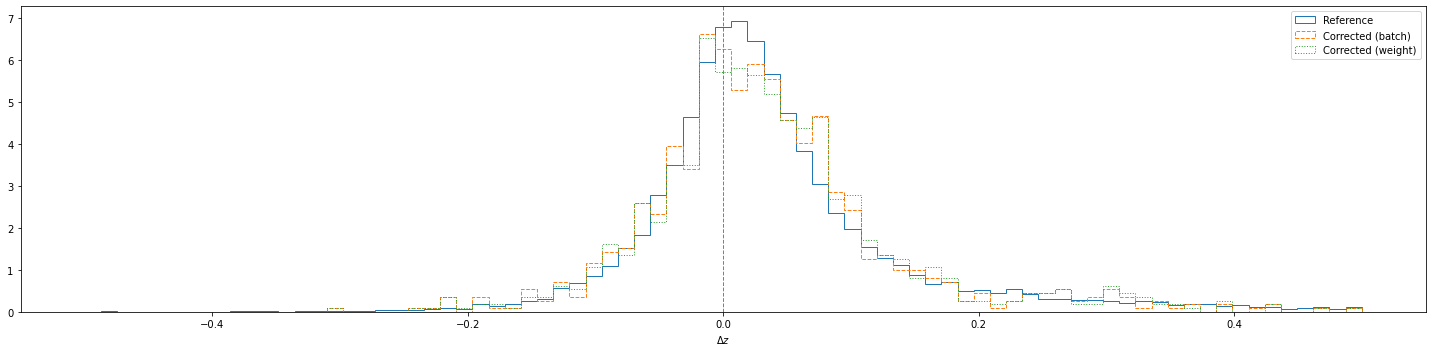

In [7]:
bins = np.linspace(-.5, .5, 80)

plt.figure(figsize=(20, 5))
plt.hist(ref_c['z'] - ref_c['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Reference', linestyle='-', density=True)
plt.hist(corr_n['z'] - corr_n['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Corrected (batch)', linestyle='--', density=True)
plt.hist(corr_w['z'] - corr_w['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Corrected (weight)', linestyle=':', density=True)
plt.axvline(0, linestyle='--', color='gray', linewidth=1)
plt.legend()
plt.xlabel('$\Delta z$')
plt.tight_layout()

In [8]:
cross = join(reference, correctednn, 'ID')
matchingnn = []
for i in range(len(cross)):
    matchingnn.append(np.in1d(cross['NEIGHBOR_IDS_1'][i], cross['NEIGHBOR_IDS_2'][i]).sum())

In [9]:
cross = join(reference, correctedwe, 'ID')
matchingw = []
for i in range(len(cross)):
    matchingw.append(np.in1d(cross['NEIGHBOR_IDS_1'][i], cross['NEIGHBOR_IDS_2'][i]).sum())

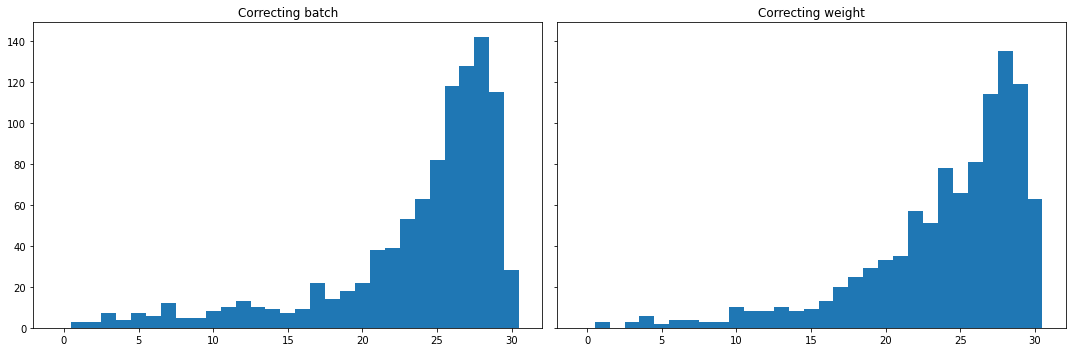

In [10]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2, sharex=True, sharey=True)
axes[0].hist(matchingnn, bins=np.arange(-0.5, 30.6))
axes[0].set_title('Correcting batch')
axes[1].hist(matchingw, bins=np.arange(-0.5, 30.6))
axes[1].set_title('Correcting weight')
fig.tight_layout()